In [10]:
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
base_path = 'data/stanford_data/Images/test'
breed_list = [entry for entry in os.listdir(base_path) if entry[0] != '.']

num_classes = len(breed_list)
print("{} breeds".format(num_classes))

n_total_images = 0
for breed in breed_list:
    n_total_images += len(os.listdir(f"{base_path}/{breed}"))
print("{} images".format(n_total_images))

120 breeds
8580 images


### Get dog breed image counts in `train` and `test` from original Stanford Dataset

In [12]:
from scipy.io import loadmat

train = loadmat('data/stanford_data/lists/train_list.mat')
test = loadmat('data/stanford_data/lists/test_list.mat')
print('train size:', len(train['file_list']))
print('test size:', len(test['file_list']))

import re

train_parse = [re.search(r"(?<=-)(\w+)(?=/)", text[0][0])[0] for text in train['file_list']]
test_parse = [re.search(r"(?<=-)(\w+)(?=/)", text[0][0])[0] for text in test['file_list']]

from collections import Counter
df_train = pd.DataFrame(Counter(train_parse).items(), columns=['breed', 'train'])
df_test = pd.DataFrame(Counter(test_parse).items(), columns=['breed', 'test'])
df_train_test = df_train.merge(df_test, on='breed', how='outer')
df_train_test.head(3)
df_train_test.shape
df_train_test.describe()

train size: 12000
test size: 8580


,breed,train,test
0,Chihuahua,100,52
1,Japanese_spaniel,100,85
2,Maltese_dog,100,152


(119, 3)

,train,test
count,119.000000,119.000000
mean,100.840336,72.100840
std,9.166985,23.346104
min,100.000000,48.000000
25%,100.000000,53.000000
50%,100.000000,61.000000
75%,100.000000,87.000000
max,200.000000,152.000000


### Create `train` and `test` folders

In [22]:
import os
from pathlib import Path
import shutil

file_list = [x[0][0] for x in test['file_list']]

source_dir = "data/stanford_data/Images" 
destination_dir = Path(source_dir, "test")
os.makedirs(destination_dir, exist_ok=True)

for file_name in file_list:
    source_path = os.path.join(source_dir, file_name)
    destination_path = os.path.join(destination_dir, file_name)
    os.makedirs(Path(destination_path).parent, exist_ok=True)

    if os.path.exists(source_path):
        shutil.move(source_path, destination_path)
        print(f"Moved: {file_name} -> {destination_dir}")
    else:
        print(f"File not found: {file_name}")

File not found: n02085620-Chihuahua/n02085620_2650.jpg
File not found: n02085620-Chihuahua/n02085620_4919.jpg
File not found: n02085620-Chihuahua/n02085620_1765.jpg
File not found: n02085620-Chihuahua/n02085620_3006.jpg
File not found: n02085620-Chihuahua/n02085620_1492.jpg
File not found: n02085620-Chihuahua/n02085620_2517.jpg
File not found: n02085620-Chihuahua/n02085620_14252.jpg
File not found: n02085620-Chihuahua/n02085620_4951.jpg
File not found: n02085620-Chihuahua/n02085620_2937.jpg
File not found: n02085620-Chihuahua/n02085620_3877.jpg
File not found: n02085620-Chihuahua/n02085620_2590.jpg
File not found: n02085620-Chihuahua/n02085620_3875.jpg
File not found: n02085620-Chihuahua/n02085620_13964.jpg
File not found: n02085620-Chihuahua/n02085620_2188.jpg
File not found: n02085620-Chihuahua/n02085620_6295.jpg
File not found: n02085620-Chihuahua/n02085620_4159.jpg
File not found: n02085620-Chihuahua/n02085620_1271.jpg
File not found: n02085620-Chihuahua/n02085620_4602.jpg
File not

In [ ]:
import os
import shutil
from pathlib import Path

# Define the root directory where folders are stored
root_dir = Path("data/stanford_data/Images/train")  # Update this path

for breed_folder in root_dir.iterdir():
    for folder in breed_folder.iterdir():
        if folder.is_dir():  # Ensure it's a folder
            for jpg_file in folder.glob("*.jpg"):  # Find all JPG files inside
                folder.rename(Path(str(folder)[:-1]))
                new_path = folder
                shutil.move(str(jpg_file.parent)[:-1]+ '/'+ jpg_file.name, str(new_path))
                print(f"Moved: {jpg_file} -> {new_path}")

            try:
                folder.rmdir()  # Removes only if empty
                print(f"Deleted empty folder: {folder}")
            except OSError:
                print(f"Skipping non-empty folder: {folder}")  # If it's not empty, it will be skipped


In [ ]:
import os
import shutil
from pathlib import Path

root_dir = Path("data/stanford_data/Images/train")  # Update this path

for breed_folder in root_dir.iterdir():
    for folder in breed_folder.iterdir():
        if folder.is_dir():  # Ensure it's a folder
            folder.rmdir()

In [26]:
from pathlib import Path

root_dir = Path("data/stanford_data/Images/")  # Change to your base directory

for folder in root_dir.glob("**/*"):  # Recursively check all folders
    if folder.is_dir() and not any(folder.iterdir()):  # Check if folder is empty
        folder.rmdir()
        print(f"Deleted empty folder: {folder}")


Deleted empty folder: data/stanford_data/Images/n02097658-silky_terrier
Deleted empty folder: data/stanford_data/Images/n02092002-Scottish_deerhound
Deleted empty folder: data/stanford_data/Images/n02099849-Chesapeake_Bay_retriever
Deleted empty folder: data/stanford_data/Images/n02091244-Ibizan_hound
Deleted empty folder: data/stanford_data/Images/n02095314-wire-haired_fox_terrier
Deleted empty folder: data/stanford_data/Images/n02091831-Saluki
Deleted empty folder: data/stanford_data/Images/n02102318-cocker_spaniel
Deleted empty folder: data/stanford_data/Images/n02104365-schipperke
Deleted empty folder: data/stanford_data/Images/n02090622-borzoi
Deleted empty folder: data/stanford_data/Images/n02113023-Pembroke
Deleted empty folder: data/stanford_data/Images/n02105505-komondor
Deleted empty folder: data/stanford_data/Images/n02093256-Staffordshire_bullterrier
Deleted empty folder: data/stanford_data/Images/n02113799-standard_poodle
Deleted empty folder: data/stanford_data/Images/n02

### Rename folder

In [58]:
import joblib

mapper = {}
lst_folder = sorted([folder.name for folder in Path("data/stanford_data/Images/train").iterdir()])
for i, folder in enumerate(lst_folder):
    # name = folder.name.split('-', 1)[1]
    # name = folder.name.lower()
    # new_name = folder.parent / name
    # folder.rename(new_name)
    mapper[folder] = i
mapper = dict(sorted(mapper.items()))
joblib.dump(mapper, 'data/stanford_data/class_mapper.pkl')

['data/stanford_data/class_mapper.pkl']

In [59]:
joblib.load('data/stanford_data/class_mapper.pkl')

{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

## Data Loader

In [4]:
# For this notebook to run with updated APIs, we need torch 1.12+ and torchvision 0.13+
try:
    import torch
    import torchvision
    assert int(torch.__version__.split(".")[1]) >= 12 or int(torch.__version__.split(".")[0]) == 2, "torch version should be 1.12+"
    assert int(torchvision.__version__.split(".")[1]) >= 13, "torchvision version should be 0.13+"
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision versions not as required, installing nightly versions.")
    !pip3 install -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")

torch version: 2.2.2
torchvision version: 0.17.2


In [3]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [56]:
from pathlib import Path
image_path = Path('data/stanford_data/images')
train_dir = image_path / 'train'
test_dir = image_path / 'test'

In [5]:
from torchvision import datasets, transforms


In [57]:
# Create image size (from Table 3 in the ViT paper)
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms: {manual_transforms}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [7]:
manual_transforms

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)

In [8]:
train_data = datasets.ImageFolder(train_dir, transform=transforms)

In [13]:
len(class_names)

120

### Patchify pictures

In [58]:
# Set the batch size
BATCH_SIZE = 32 # this is lower than the ViT paper but it's because we're starting small

# Create data loaders
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manual_transforms, # use manually created transforms
    batch_size=BATCH_SIZE
)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x14d8d9930>,
 ['affenpinscher',
  'afghan_hound',
  'african_hunting_dog',
  'airedale',
  'american_staffordshire_terrier',
  'appenzeller',
  'australian_terrier',
  'basenji',
  'basset',
  'beagle',
  'bedlington_terrier',
  'bernese_mountain_dog',
  'black-and-tan_coonhound',
  'blenheim_spaniel',
  'bloodhound',
  'bluetick',
  'border_collie',
  'border_terrier',
  'borzoi',
  'boston_bull',
  'bouvier_des_flandres',
  'boxer',
  'brabancon_griffon',
  'briard',
  'brittany_spaniel',
  'bull_mastiff',
  'cairn',
  'cardigan',
  'chesapeake_bay_retriever',
  'chihuahua',
  'chow',
  'clumber',
  'cocker_spaniel',
  'collie',
  'curly-coated_retriever',
  'dandie_dinmont',
  'dhole',
  'dingo',
  'doberman',
  'english_foxhound',
  'english_setter',
  'english_springer',
  'entlebucher',
  'eskimo_dog',
  'flat-coated_retriever',
  'french_bulldog',
  'german_shepherd',
  'german_short-haired_pointer',
  'giant_schnauzer',
  'golden_ret

In [16]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

python(56695) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56696) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56697) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56698) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56699) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56702) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56704) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56707) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56711) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(56712) Malloc

(torch.Size([3, 224, 224]), tensor(0))

(-0.5, 223.5, 223.5, -0.5)

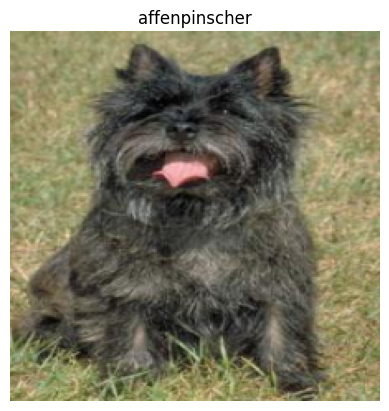

In [18]:
# Plot image with matplotlib
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False)

In [19]:
from torch import nn

# Set the patch size
patch_size=16

# Create the Conv2d layer with hyperparameters from the ViT paper
conv2d = nn.Conv2d(in_channels=3, # number of color channels
                   out_channels=768, # from Table 1: Hidden size D, this is the embedding size
                   kernel_size=patch_size, # could also use (patch_size, patch_size)
                   stride=patch_size,
                   padding=0)

In [19]:
224*224/16/16
3*16*16

196.0

768

In [27]:
# Pass the image through the convolutional layer
image_out_of_conv = conv2d(image.unsqueeze(0)) # add a single batch dimension (height, width, color_channels) -> (batch, height, width, color_channels)
print(image_out_of_conv.shape)

torch.Size([1, 768, 14, 14])


Showing random convolutional feature maps from indexes: [71, 698, 97, 646, 15]


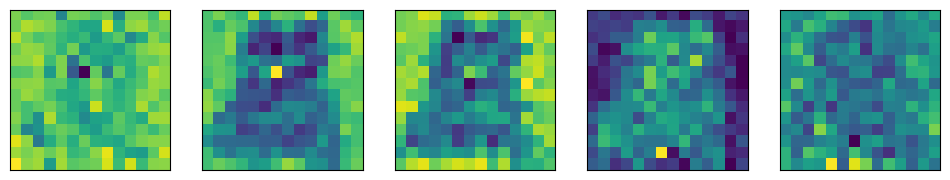

In [33]:
# Plot random 5 convolutional feature maps
import random
random_indexes = random.sample(range(0, 758), k=5) # pick 5 numbers between 0 and the embedding size
print(f"Showing random convolutional feature maps from indexes: {random_indexes}")

# Create plot
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12, 12))

# Plot random image feature maps
for i, idx in enumerate(random_indexes):
    image_conv_feature_map = image_out_of_conv[:, idx, :, :] # index on the output tensor of the convolutional layer
    axs[i].imshow(image_conv_feature_map.squeeze().detach().numpy())
    axs[i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[]);

In [34]:
# Get a single feature map in tensor form
single_feature_map = image_out_of_conv[:, 0, :, :]
single_feature_map, single_feature_map.requires_grad

(tensor([[[ 0.1155,  0.1397,  0.0904,  0.1225,  0.0337,  0.1403,  0.1006,
            0.1368,  0.0551,  0.0623,  0.1453,  0.0985, -0.0019,  0.0972],
          [ 0.1288,  0.0399,  0.0905,  0.0808, -0.1160, -0.0674,  0.2109,
            0.1046, -0.1122,  0.1325,  0.2572,  0.0701,  0.1510,  0.1138],
          [ 0.1036,  0.1061,  0.1046,  0.0060, -0.0986, -0.0440, -0.0441,
           -0.0511,  0.1121,  0.0173,  0.2055,  0.0923,  0.0727,  0.1248],
          [ 0.1541,  0.1346,  0.1138, -0.1557,  0.0082,  0.1001, -0.0120,
            0.0895, -0.0030, -0.0107, -0.0021,  0.1576,  0.0546,  0.1041],
          [ 0.1515,  0.1183,  0.0285, -0.0170,  0.1172, -0.0067, -0.0108,
            0.0025,  0.0177, -0.0429,  0.1060,  0.1746,  0.0554,  0.0895],
          [ 0.0890,  0.1193,  0.0786, -0.1358, -0.0506,  0.2894,  0.1411,
           -0.1591, -0.0199,  0.0395,  0.0738,  0.1764,  0.1025,  0.0665],
          [ 0.0544,  0.0455,  0.1172, -0.1318,  0.1990, -0.0494, -0.0519,
            0.0524, -0.0050,  0.

In [38]:
# Current tensor shape
print(f"Current tensor shape: {image_out_of_conv.shape} -> [batch, embedding_dim, feature_map_height, feature_map_width]")
print('embedding_dim: 3 x 16 x 16 (Color Channel x Conv Filter Size)')

Current tensor shape: torch.Size([1, 768, 14, 14]) -> [batch, embedding_dim, feature_map_height, feature_map_width]
embedding_dim: 3 x 16 x 16 (Color Channel x Conv Filter Size)


In [44]:
# Create flatten layer
flatten = nn.Flatten(start_dim=2, # flatten feature_map_height (dimension 2)
                     end_dim=3) # flatten feature_map_width (dimension 3)

Original image shape: torch.Size([3, 224, 224])
Image feature map shape: torch.Size([1, 768, 14, 14])
Flattened image feature map shape: torch.Size([1, 768, 196])


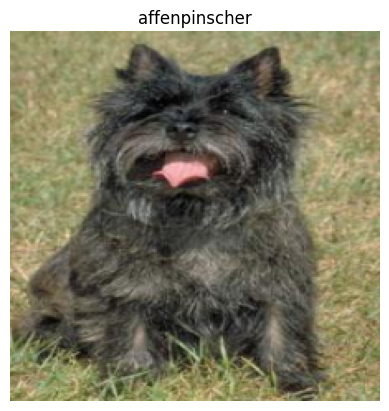

In [45]:
# 1. View single image
plt.imshow(image.permute(1, 2, 0)) # adjust for matplotlib
plt.title(class_names[label])
plt.axis(False);
print(f"Original image shape: {image.shape}")

# 2. Turn image into feature maps
image_out_of_conv = conv2d(image.unsqueeze(0)) # add batch dimension to avoid shape errors
print(f"Image feature map shape: {image_out_of_conv.shape}")

# 3. Flatten the feature maps
image_out_of_conv_flattened = flatten(image_out_of_conv)
print(f"Flattened image feature map shape: {image_out_of_conv_flattened.shape}")

In [46]:
# Get flattened image patch embeddings in right shape
image_out_of_conv_flattened_reshaped = image_out_of_conv_flattened.permute(0, 2, 1) # [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]
print(f"Patch embedding sequence shape: {image_out_of_conv_flattened_reshaped.shape} -> [batch_size, num_patches, embedding_size]")

Patch embedding sequence shape: torch.Size([1, 196, 768]) -> [batch_size, num_patches, embedding_size]


In [49]:
image_out_of_conv_flattened_reshaped.shape

torch.Size([1, 196, 768])

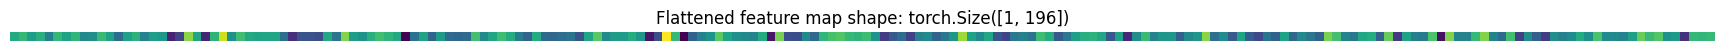

In [47]:
# Get a single flattened feature map
single_flattened_feature_map = image_out_of_conv_flattened_reshaped[:, :, 0] # index: (batch_size, number_of_patches, embedding_dimension)

# Plot the flattened feature map visually
plt.figure(figsize=(22, 22))
plt.imshow(single_flattened_feature_map.detach().numpy())
plt.title(f"Flattened feature map shape: {single_flattened_feature_map.shape}")
plt.axis(False);

In [ ]:
# 1. Create a class which subclasses nn.Module
class PatchEmbedding(nn.Module):
    """Turns a 2D input image into a 1D sequence learnable embedding vector.

    Args:
        in_channels (int): Number of color channels for the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768.
    """
    # 2. Initialize the class with appropriate variables
    def __init__(self,
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()

        # 3. Create a layer to turn an image into patches
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

        # 4. Create a layer to flatten the patch feature maps into a single dimension
        self.flatten = nn.Flatten(start_dim=2, # only flatten the feature map dimensions into a single vector
                                  end_dim=3)

    # 5. Define the forward method
    def forward(self, x):
        # Create assertion to check that inputs are the correct shape
        image_resolution = x.shape[-1]
        assert image_resolution % patch_size == 0, f"Input image size must be divisible by patch size, image shape: {image_resolution}, patch size: {patch_size}"

        # Perform the forward pass
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)
        # 6. Make sure the output shape has the right order
        return x_flattened.permute(0, 2, 1) # adjust so the embedding is on the final dimension [batch_size, P^2•C, N] -> [batch_size, N, P^2•C]

In [68]:
patcher = PatchEmbedding(in_channels=3,
                          patch_size=16,
                          embedding_dim=768)
patcher(image.unsqueeze(0)).shape

torch.Size([1, 196, 768])

In [7]:
244*244/16/16

232.5625

In [88]:
# Create random input sizes
random_input_image = (1, 3, 224, 224)
random_input_image_error = (1, 3, 250, 250) # will error because image size is incompatible with patch_size

# # Get a summary of the input and outputs of PatchEmbedding (uncomment for full output)
summary(PatchEmbedding(),
        input_size=random_input_image, # try swapping this for "random_input_image_error"
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
PatchEmbedding (PatchEmbedding)          [1, 3, 224, 224]     [1, 196, 768]        --                   True
├─Conv2d (conv2d)                        [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
├─Flatten (flatten)                      [1, 768, 14, 14]     [1, 768, 196]        --                   --
Total params: 590,592
Trainable params: 590,592
Non-trainable params: 0
Total mult-adds (M): 115.76
Input size (MB): 0.60
Forward/backward pass size (MB): 1.20
Params size (MB): 2.36
Estimated Total Size (MB): 4.17

In [37]:
3*16*16 * 768 + 768

590592

### Encoder Architecture

In [24]:
import torch.nn as nn
from model.vit import PatchEmbedding, MultiheadSelfAttentionBlock, MLPBlock

class TransformerEncoderBlock(nn.Module):

    def __init__(self, 
                embedding_dim: int = 768,  # Hidden size D from Table 1 for ViT-Base
                num_heads: int = 12,  # Heads from Table 1 for ViT-Base
                attn_dropout: float = 0,
                mlp_size: int = 3072,  # MLP size from Table 1 for ViT-Base
                mlp_dropout: float = 0.1,
        ):
        super().__init__()
        self.mha = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim, num_heads=num_heads, attn_dropout=attn_dropout)
        self.mlp = MLPBlock(embedding_dim=embedding_dim, mlp_size=mlp_size, dropout=mlp_dropout)

    def forward(self, x):
        x = self.mha(x) + x
        x = self.mlp(x) + x
        return x

In [39]:
4*(768 * 768)

2359296

In [ ]:
# Create an instance of TransformerEncoderBlock
transformer_encoder_block = TransformerEncoderBlock()

# Print an input and output summary of our Transformer Encoder (uncomment for full output)
summary(model=transformer_encoder_block,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

### ViT

In [51]:
import torch.nn as nn
from model.vit import PatchEmbedding, MultiheadSelfAttentionBlock, MLPBlock, TransformerEncoderBlock

class ViT(nn.Module):
    def __init__(self,
                 img_size:int=224, # Training resolution from Table 3 in ViT paper
                 in_channels:int=3, # Number of channels in input image
                 patch_size:int=16, # Patch size
                 num_transformer_layers:int=3, # Layers from Table 1 for ViT-Base
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0, # Dropout for attention projection
                 mlp_dropout:float=0.1, # Dropout for dense/MLP layers
                 embedding_dropout:float=0.1, # Dropout for patch and position embeddings
                 num_classes:int=1000): # Default for ImageNet but can customize this
        super().__init__() # don't forget the super().__init__()!

        self.num_patches = (img_size * img_size) // patch_size**2

        self.class_embed = nn.Parameter(torch.randn(1, 1, embedding_dim), requires_grad=True)
        self.pos_embed = nn.Parameter(torch.randn(1, self.num_patches+1, embedding_dim), requires_grad=True)
        self.embedding_dropout = nn.Dropout(p=embedding_dropout)

        self.patcher = PatchEmbedding(in_channels=in_channels, patch_size=patch_size, embedding_dim=embedding_dim)
        self.encoders = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim, num_heads=num_heads, mlp_size=mlp_size, 
                                                                mlp_dropout=mlp_dropout, attn_dropout=attn_dropout) for _ in range(num_transformer_layers)])
        self.classifier = nn.Sequential(
            torch.nn.LayerNorm(normalized_shape=embedding_dim), 
            torch.nn.Linear(in_features=embedding_dim, out_features=num_classes)
        )
    def forward(self, x):
        batch_size = x.shape[0]
        class_embed = self.class_embed.expand(batch_size, -1, -1)
        x = self.patcher(x)
        x = torch.cat((class_embed, x), dim=1)
        x = x + self.pos_embed
        x = self.embedding_dropout(x)
        x = self.encoders(x)
        x = self.classifier(x[:, 0])
        return x

In [12]:
vit = ViT()
dummy_input = torch.randn(1, 3, 224, 224)  # Batch of 2, RGB images, 224x224
output = vit(dummy_input)
output.shape

torch.Size([1, 197, 768])

In [27]:
patch_embedding = torch.randn(32, 196, 768)
class_token = nn.Parameter(torch.randn(1, 1, 768))
class_token = class_token.expand(32, -1, -1)
patch_embedding.shape, class_token.shape

torch.cat((class_token, patch_embedding), dim=1).shape

(torch.Size([32, 196, 768]), torch.Size([32, 1, 768]))

torch.Size([32, 197, 768])

In [52]:
vit = ViT()

summary(model=vit,
        input_size=(3, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [3, 3, 224, 224]     [3, 1000]            152,064              True
├─PatchEmbedding (patcher)                                   [3, 3, 224, 224]     [3, 196, 768]        --                   True
│    └─Conv2d (patcher)                                      [3, 3, 224, 224]     [3, 768, 14, 14]     590,592              True
│    └─Flatten (flatten)                                     [3, 768, 14, 14]     [3, 768, 196]        --                   --
├─Dropout (embedding_dropout)                                [3, 197, 768]        [3, 197, 768]        --                   --
├─Sequential (encoders)                                      [3, 197, 768]        [3, 197, 768]        --                   True
│    └─TransformerEncoderBlock (0)                           [3, 197, 768]        [3, 197, 768] 

In [53]:
# Example of creating the class embedding and expanding over a batch dimension
batch_size = 32
class_token_embedding_single = nn.Parameter(data=torch.randn(1, 1, 768)) # create a single learnable class token
class_token_embedding_expanded = class_token_embedding_single.expand(batch_size, -1, -1) # expand the single learnable class token across the batch dimension, "-1" means to "infer the dimension"

# Print out the change in shapes
print(f"Shape of class token embedding single: {class_token_embedding_single.shape}")
print(f"Shape of class token embedding expanded: {class_token_embedding_expanded.shape}")

Shape of class token embedding single: torch.Size([1, 1, 768])
Shape of class token embedding expanded: torch.Size([32, 1, 768])


In [59]:
set_seeds()

# Create a random tensor with same shape as a single image
random_image_tensor = torch.randn(1, 3, 224, 224) # (batch_size, color_channels, height, width)

# Create an instance of ViT with the number of classes we're working with (pizza, steak, sushi)
vit = ViT(num_classes=len(class_names))

# Pass the random image tensor to our ViT instance
vit(random_image_tensor)

tensor([[-0.4475,  0.3363,  0.2734,  0.1483, -0.2037,  0.4833,  0.3295,  0.9271,
         -0.0303, -0.7289, -0.5680, -0.5363,  0.3654,  0.0200, -0.3732,  0.7158,
         -0.3010, -0.1728, -0.5216,  0.1103,  1.0782,  0.2731, -1.3884,  0.4248,
         -0.0924,  0.3140, -0.0755, -0.2225, -0.0520, -0.3735,  0.4041,  0.4145,
         -0.3801,  0.4893, -0.5812, -0.5029,  0.8766, -1.0919, -0.2812, -0.1671,
         -0.2500,  0.0336,  0.4867, -0.8795,  0.7258,  0.6112, -0.4906, -1.0678,
         -0.4119,  0.3872, -1.5604,  0.3798, -0.4512,  1.0469, -0.2278,  0.8741,
          0.0086, -0.0997, -0.1655, -0.8140, -0.6780,  0.1776,  0.9752, -0.3881,
         -0.4481, -0.3784,  0.1508,  0.4277, -1.0833, -0.2577, -0.2579,  0.0707,
          0.2533, -0.8686,  0.6794,  0.1171, -0.0143,  0.0815,  0.6681, -0.8550,
          0.1153,  0.1704, -0.4894,  0.4821, -0.2749, -0.5304, -0.4173, -0.0035,
         -0.9543,  1.1403,  0.3977,  1.4089, -0.7706, -0.8846, -0.0519,  0.0542,
          0.1392,  0.4620,  